<a href="https://colab.research.google.com/github/Ramaprasad89/final-year-project/blob/main/Topic_2_sep_25_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Description**

**Introduction**

This project aims to develop a machine learning model for predicting lung cancer risk using synthetic Electronic Health Record (EHR) data, which includes features such as demographics, vitals, and lifestyle indicators. The focus is on comparing the performance of models trained on multiple feature groups versus those using single features, while addressing the challenge of severe class imbalance between rare lung cancer cases and controls. The project will explore rebalancing strategies like SMOTE, class weighting, and ensemble resampling to mitigate bias. Additionally, explainable AI techniques such as SHAP and LIME will be used to identify key features influencing the prediction, with findings compared to established clinical risk factors. The dataset, created for academic purposes, mimics real-world patient data without using any actual patient information.

**Research Questions:**

1. 1.	To what extent can heterogeneous EHR features (demographics, vitals, lifestyle indicators) be integrated to improve predictive performance for lung cancer risk, compared to models trained on single feature groups?

2. 2.	How does severe class imbalance (rare lung cancer cases vs many controls) impact the reliability of different machine learning models, and which rebalancing strategies (SMOTE, class weighting, ensemble resampling) best mitigate bias?

3. 3.	How can explainable AI techniques (e.g., SHAP, LIME) be used to identify the most influential features for lung cancer risk classification, and do these align with known clinical risk factors?

**Dataset Details:**


- **Name:** synthetic Electronic Health Record (EHR) dataset    
- **Source:** [Mendely  – synthetic Electronic Health Record (EHR) dataset](https://data.mendeley.com/datasets/b24cb4nn8h/1)  
- **Contributors:** The dataset was generated and published by researchers on Mendeley Data (Elsevier) as a synthetic Electronic Health Record (EHR) dataset for academic purposes


# **Importing Files**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, confusion_matrix
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import time

# **Read Dataset**

In [ ]:
file_path = 'Dataset - Updated (1).csv'
df = pd.read_csv(file_path)

#**Exploratory Data Analysis (EDA)**
 EDA is performed to have an idea about the dataset regarding data distribution

**Showing the First Rows of the Data Set**

In [ ]:
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate,Risk Level
0,22,90.0,60.0,9.0,100,18.0,1.0,1.0,0,1,80.0,High
1,22,110.0,70.0,7.1,98,20.4,0.0,0.0,0,0,74.0,Low
2,27,110.0,70.0,7.5,98,23.0,1.0,0.0,0,0,72.0,Low
3,20,100.0,70.0,7.2,98,21.2,0.0,0.0,0,0,74.0,Low
4,20,90.0,60.0,7.5,98,19.7,0.0,0.0,0,0,74.0,Low


**Checking Columns Name**

In [ ]:
print("\nColumns in the dataset:")
df.columns



Columns in the dataset:


Index(['Age', 'Systolic BP', 'Diastolic', 'BS', 'Body Temp', 'BMI',
       'Previous Complications', 'Preexisting Diabetes',
       'Gestational Diabetes', 'Mental Health', 'Heart Rate', 'Risk Level'],
      dtype='object')

**Displaying Shape of the dataset**

In [ ]:
print("\nTotal rows and columns in the dataset:")
df.shape


Total rows and columns in the dataset:


(1205, 12)

## **Descriptive statistical Analysis for numerical columns**

In [ ]:
print("\nDescriptive Statistics for Numerical Columns:")
df.describe()


Descriptive Statistics for Numerical Columns:


,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate
count,1205.000000,1200.000000,1201.000000,1203.000000,1205.000000,1187.000000,1203.000000,1203.000000,1205.000000,1205.00000,1203.000000
mean,27.731950,116.819167,77.166528,7.501064,98.395851,23.315080,0.175395,0.288446,0.117842,0.33444,75.817124
std,12.571074,18.715502,14.305148,3.049522,1.088363,3.875682,0.380463,0.453228,0.322555,0.47199,7.227338
min,10.000000,70.000000,40.000000,3.000000,97.000000,0.000000,0.000000,0.000000,0.000000,0.00000,58.000000
25%,21.000000,100.000000,65.000000,6.000000,98.000000,20.450000,0.000000,0.000000,0.000000,0.00000,70.000000
50%,25.000000,120.000000,80.000000,6.900000,98.000000,23.000000,0.000000,0.000000,0.000000,0.00000,76.000000
75%,32.000000,130.000000,90.000000,7.900000,98.000000,25.000000,0.000000,1.000000,0.000000,1.00000,80.000000
max,325.000000,200.000000,140.000000,19.000000,103.000000,37.000000,1.000000,1.000000,1.000000,1.00000,92.000000


##**Distribution for Numerical Features**

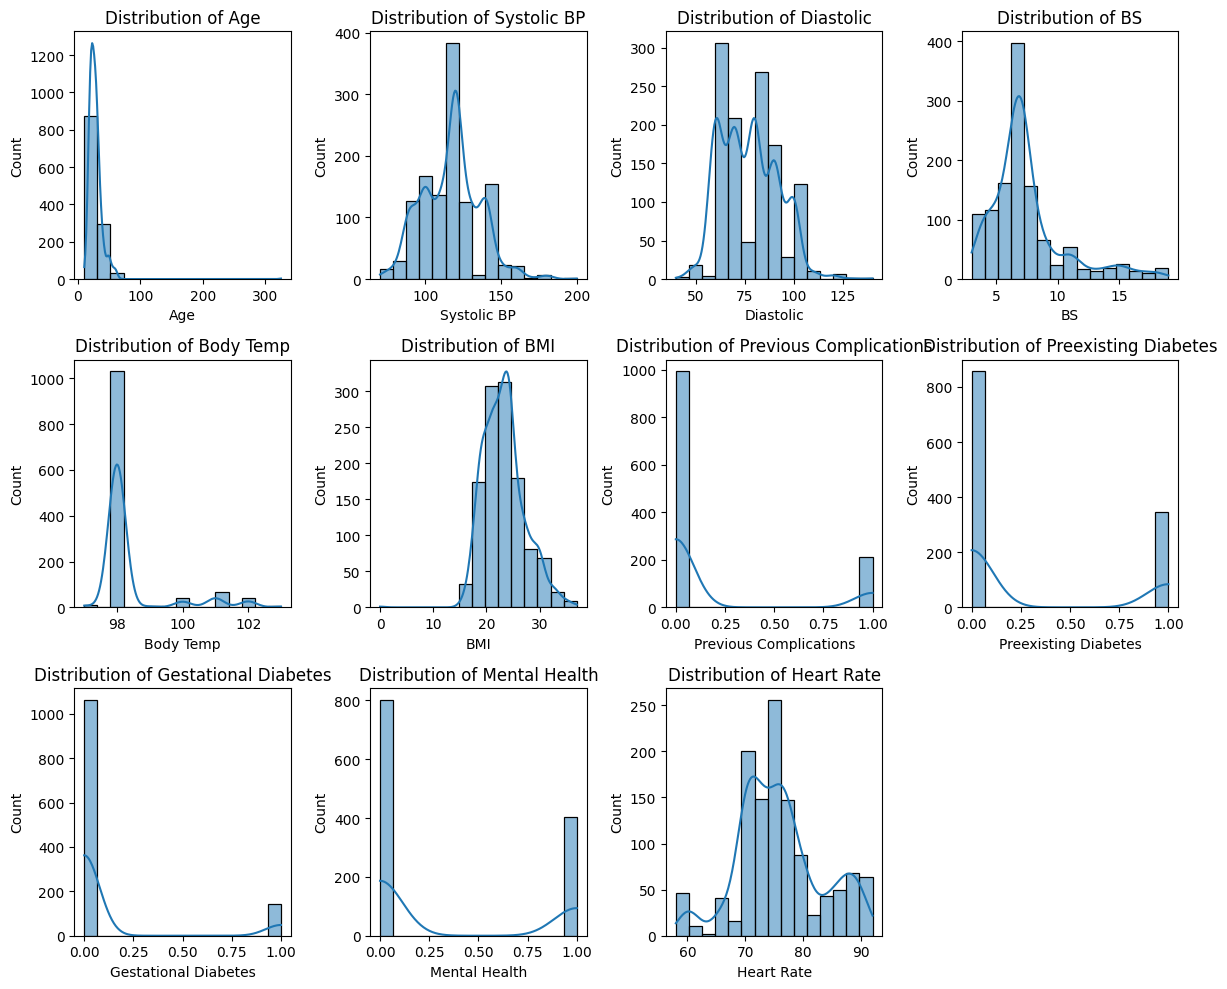

In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[col], kde=True, bins=15)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


## **Correlation Matrix**

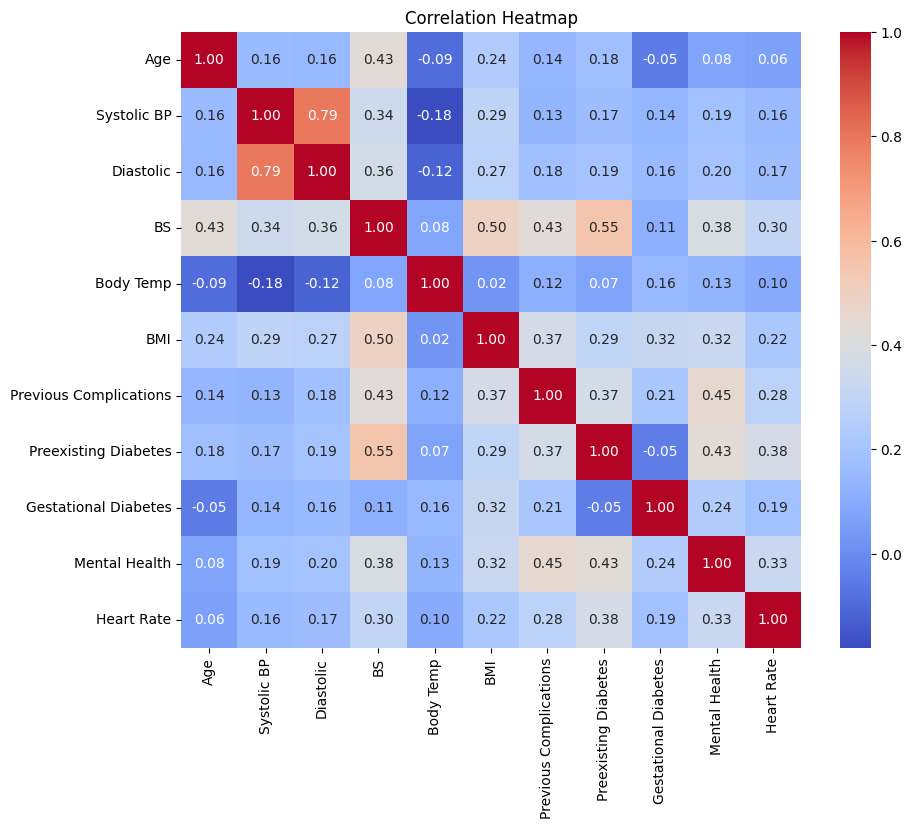

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Heatmap")
plt.show()

## **Count plot on Label Colom**

/tmp/ipython-input-3044544237.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Risk Level', data=df, palette='viridis') # Added palette='viridis'


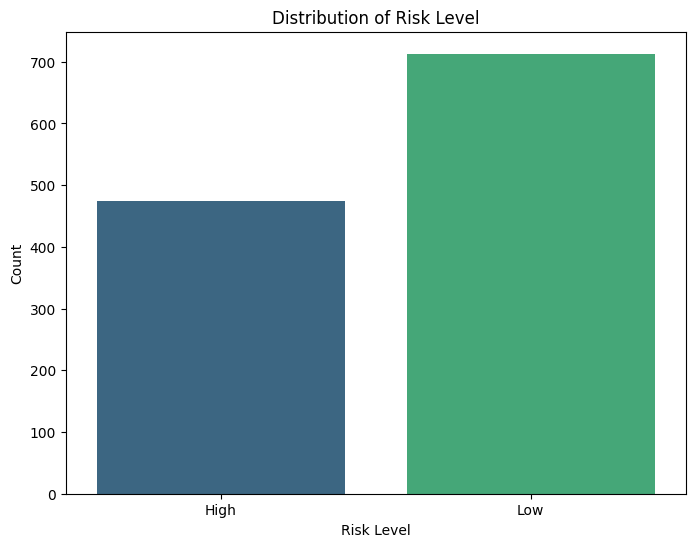

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Risk Level', data=df, palette='viridis') # Added palette='viridis'
plt.title('Distribution of Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()

In [ ]:
print("Number of rows for each Risk Level:")
print(df['Risk Level'].value_counts())

Number of rows for each Risk Level:
Risk Level
Low     713
High    474
Name: count, dtype: int64


# **Checking For Missing Values**

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Age                        0
Systolic BP                5
Diastolic                  4
BS                         2
Body Temp                  0
BMI                       18
Previous Complications     2
Preexisting Diabetes       2
Gestational Diabetes       0
Mental Health              0
Heart Rate                 2
Risk Level                18
dtype: int64


**imputation of missing columns by mean for numeric and non-numeric entries**

In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())
non_numerical_columns = df.select_dtypes(include=['object']).columns
df[non_numerical_columns] = df[non_numerical_columns].fillna(df[non_numerical_columns].mode().iloc[0])

**Re-checking Missing Values**

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Age                       0
Systolic BP               0
Diastolic                 0
BS                        0
Body Temp                 0
BMI                       0
Previous Complications    0
Preexisting Diabetes      0
Gestational Diabetes      0
Mental Health             0
Heart Rate                0
Risk Level                0
dtype: int64


# **Model Training**

**Encoding target variable and Data splitting**

In [ ]:
# Encode target (Low=0, High=1)
df = df.copy()
df["Risk Level"] = df["Risk Level"].map({"Low": 0, "High": 1})

feature_cols = [c for c in df.columns if c != "Risk Level"]
X = df[feature_cols].values
y = df["Risk Level"].values

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


**Evaluation Function**

In [ ]:
def evaluate(name, model, X_tr, y_tr, X_te, y_te, scale_for=None):
    # Optional scaling (you said LR only)
    if scale_for == "lr":
        scaler = StandardScaler()
        X_tr = scaler.fit_transform(X_tr)
        X_te = scaler.transform(X_te)

    t0 = time.perf_counter()
    model.fit(X_tr, y_tr)
    train_time = time.perf_counter() - t0

    # Scores for ranking/ROC
    use_proba = hasattr(model, "predict_proba")
    scores = model.predict_proba(X_te)[:, 1] if use_proba else model.decision_function(X_te)

    # Correct thresholding per score type
    thresh = 0.5 if use_proba else 0.0
    pred = (scores >= thresh).astype(int)

    # Metrics
    metrics = {
        "model": name,
        "accuracy": accuracy_score(y_te, pred),
        "precision": precision_score(y_te, pred, zero_division=0),
        "recall": recall_score(y_te, pred, zero_division=0),
        "f1": f1_score(y_te, pred, zero_division=0),
        "roc_auc": roc_auc_score(y_te, scores),
        "pr_auc": average_precision_score(y_te, scores),
    }

    cm = confusion_matrix(y_te, pred)
    report = classification_report(y_te, pred, digits=4)

    # Rough per-sample prediction time * number of samples
    t1 = time.perf_counter()
    _ = (scores >= thresh)  # already computed; this just keeps symmetry
    test_time = time.perf_counter() - t1  # very small; if you prefer, time predict() separately

    times = {"model": name, "train_time_s": train_time, "test_time_s": test_time}

    return metrics, model, scores, pred, cm, report, times

def show_results(results):
    table = pd.DataFrame(results).sort_values("roc_auc", ascending=False).reset_index(drop=True)
    print("\n=== Test Metrics (sorted by ROC AUC) ===")
    print(table.to_string(index=False, float_format=lambda x: f"{x:.4f}"))
    return table


**Defining Models**

In [ ]:
models = [
    ("LogisticRegression",
     LogisticRegression(max_iter=1000, class_weight="balanced", solver="lbfgs"), "lr"),

    ("RandomForest",
     RandomForestClassifier(n_estimators=400, random_state=42, class_weight="balanced_subsample"), None),

    ("GradientBoosting",
     GradientBoostingClassifier(random_state=42), None),
]


**Training Model and Evaluating Results**

In [ ]:
runs, results, times = [], [], []

for name, clf, scale_flag in models:
    m, fitted, scores, pred, cm, rpt, t = evaluate(
        name, clf, X_train, y_train, X_test, y_test, scale_for=scale_flag
    )
    results.append(m)
    times.append(t)
    runs.append({
        "name": name,
        "model": fitted,
        "scores": scores,  # for ROC
        "pred": pred,
        "cm": cm,
        "report": rpt
    })

summary = show_results(results)

# Pretty tables you asked for
summary_df = pd.DataFrame(results).set_index("model")
times_df   = pd.DataFrame(times).set_index("model").loc[summary_df.index]  # same order as summary


display(times_df)



=== Test Metrics (sorted by ROC AUC) ===
             model  accuracy  precision  recall     f1  roc_auc  pr_auc
  GradientBoosting    0.9959     1.0000  0.9895 0.9947   1.0000  1.0000
      RandomForest    0.9917     1.0000  0.9789 0.9894   0.9997  0.9996
LogisticRegression    0.9834     0.9691  0.9895 0.9792   0.9975  0.9961


,train_time_s,test_time_s
model,,
LogisticRegression,0.006973,0.000008
RandomForest,1.226844,0.000011
GradientBoosting,0.390314,0.000008


**Roc Curve, Confusion Matrix, and Classification Report**

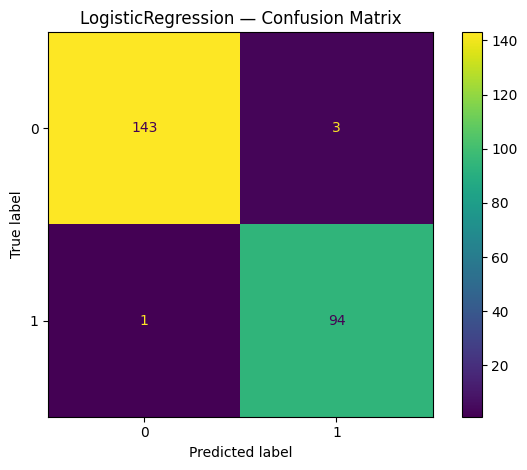

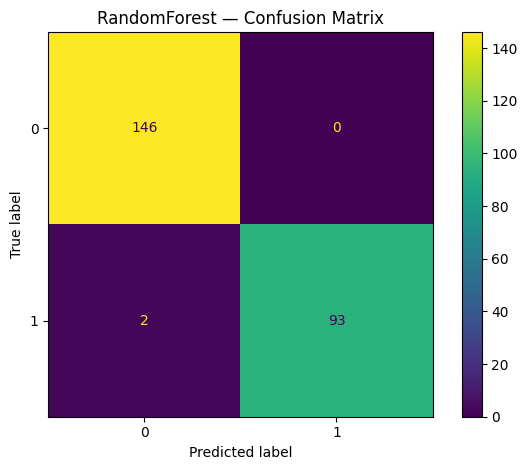

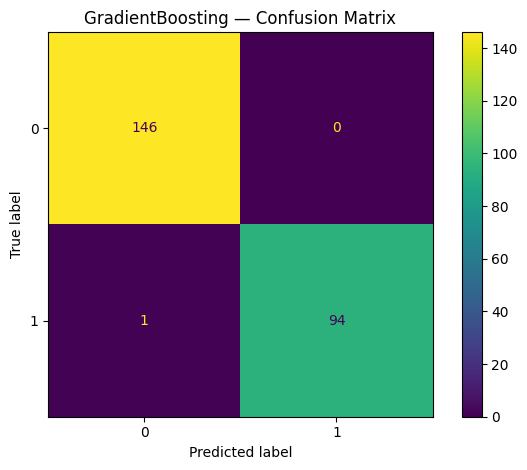

<Figure size 640x480 with 0 Axes>

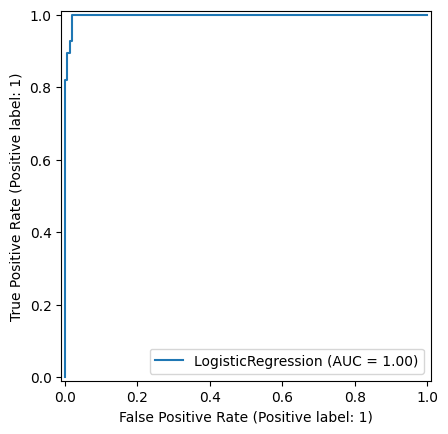

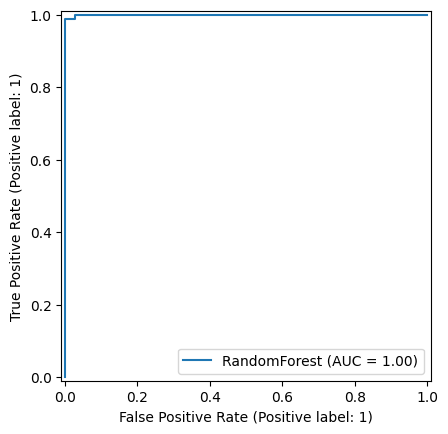

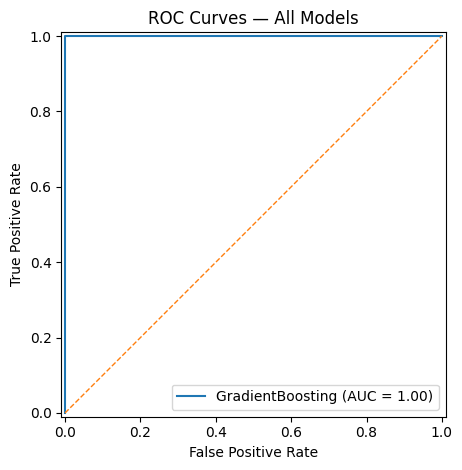


=== Classification Report: LogisticRegression ===
              precision    recall  f1-score   support

           0     0.9931    0.9795    0.9862       146
           1     0.9691    0.9895    0.9792        95

    accuracy                         0.9834       241
   macro avg     0.9811    0.9845    0.9827       241
weighted avg     0.9836    0.9834    0.9834       241


=== Classification Report: RandomForest ===
              precision    recall  f1-score   support

           0     0.9865    1.0000    0.9932       146
           1     1.0000    0.9789    0.9894        95

    accuracy                         0.9917       241
   macro avg     0.9932    0.9895    0.9913       241
weighted avg     0.9918    0.9917    0.9917       241


=== Classification Report: GradientBoosting ===
              precision    recall  f1-score   support

           0     0.9932    1.0000    0.9966       146
           1     1.0000    0.9895    0.9947        95

    accuracy                         

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

# Confusion matrices (one figure per model)
for r in runs:
    ConfusionMatrixDisplay.from_predictions(y_test, r["pred"])
    plt.title(f'{r["name"]} — Confusion Matrix')
    plt.tight_layout()
    plt.show()

# ROC curves (all models on one plot)
plt.figure()
for r in runs:
    RocCurveDisplay.from_predictions(y_test, r["scores"], name=r["name"])
plt.plot([0, 1], [0, 1], linestyle="--", linewidth=1)
plt.title("ROC Curves — All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.tight_layout()
plt.show()

# Classification reports (text)
for r in runs:
    print(f"\n=== Classification Report: {r['name']} ===")
    print(r["report"])


**K-Fold Cross Validation**

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def fit_and_score(name, clf, Xtr, ytr, Xte, yte, scale_for=None):
    if scale_for == "lr":
        sc = StandardScaler()
        Xtr = sc.fit_transform(Xtr); Xte = sc.transform(Xte)
    clf.fit(Xtr, ytr)
    proba = clf.predict_proba(Xte)[:,1] if hasattr(clf, "predict_proba") else clf.decision_function(Xte)
    pred  = (proba >= 0.5).astype(int)
    return {
        "accuracy":  accuracy_score(yte, pred),
        "precision": precision_score(yte, pred, zero_division=0),
        "recall":    recall_score(yte, pred, zero_division=0),
        "f1":        f1_score(yte, pred, zero_division=0),
        "roc_auc":   roc_auc_score(yte, proba),
        "pr_auc":    average_precision_score(yte, proba),
    }

cv_scores = {name: [] for name, _, _ in models}

for tr_idx, te_idx in kf.split(X, y):
    Xtr, Xte = X[tr_idx], X[te_idx]
    ytr, yte = y[tr_idx], y[te_idx]
    for name, clf, scale_flag in models:
        cv_scores[name].append(fit_and_score(name, clf, Xtr, ytr, Xte, yte, scale_for=scale_flag))

# aggregate mean ± sd
rows = []
for name, fold_list in cv_scores.items():
    dfm = pd.DataFrame(fold_list)
    row = {("model"): name}
    for col in dfm.columns:
        row[f"{col}_mean"] = dfm[col].mean()
        row[f"{col}_sd"]   = dfm[col].std(ddof=1)
    rows.append(row)

cv_table = pd.DataFrame(rows).sort_values("roc_auc_mean", ascending=False).reset_index(drop=True)
print("\n=== 5-fold CV (mean ± sd) ===")
with pd.option_context('display.float_format', lambda x: f"{x:.4f}"):
    print(cv_table.to_string(index=False))



=== 5-fold CV (mean ± sd) ===
             model  accuracy_mean  accuracy_sd  precision_mean  precision_sd  recall_mean  recall_sd  f1_mean  f1_sd  roc_auc_mean  roc_auc_sd  pr_auc_mean  pr_auc_sd
      RandomForest         0.9859       0.0047          0.9772        0.0132       0.9873     0.0047   0.9822 0.0058        0.9974      0.0027       0.9940     0.0083
  GradientBoosting         0.9834       0.0083          0.9791        0.0144       0.9789     0.0182   0.9789 0.0106        0.9969      0.0031       0.9929     0.0090
LogisticRegression         0.9676       0.0080          0.9488        0.0179       0.9705     0.0156   0.9594 0.0098        0.9930      0.0031       0.9869     0.0069
